In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC

pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
import helper as hp
matplotlib.rc('figure', figsize=[10,5])
np.random.seed(44)

import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)



# 1. Data Load and Preprocessing

In [2]:
#Getting data for Phishing Dataset

phishing_dataset = pd.read_csv('data/PhishingWebsitesData.csv').astype('category')
print(phishing_dataset.info())
phishing_dataset.head()
phishing_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   having_IP_Address            11055 non-null  category
 1   URL_Length                   11055 non-null  category
 2   Shortining_Service           11055 non-null  category
 3   having_At_Symbol             11055 non-null  category
 4   double_slash_redirecting     11055 non-null  category
 5   Prefix_Suffix                11055 non-null  category
 6   having_Sub_Domain            11055 non-null  category
 7   SSLfinal_State               11055 non-null  category
 8   Domain_registeration_length  11055 non-null  category
 9   Favicon                      11055 non-null  category
 10  port                         11055 non-null  category
 11  HTTPS_token                  11055 non-null  category
 12  Request_URL                  11055 non-null  category
 13  U

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,9553,9259,6560,5337,4449,8440,9041,9426,9776,9740,10579,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [3]:
# converting categorical data to binery for accuracy

category_col = ['URL_Length','having_Sub_Domain','SSLfinal_State','URL_of_Anchor','Links_in_tags','SFH','web_traffic','Links_pointing_to_page']
category_df = phishing_dataset[category_col]
category_df = pd.get_dummies(category_df)
df_others = phishing_dataset.drop(category_col,axis=1)

phishing_dataset = pd.concat([category_df,df_others],axis=1)
phishing_dataset = phishing_dataset.replace(-1,0).astype('category')
column_order = list(phishing_dataset)
column_order.insert(0, column_order.pop(column_order.index('Result')))
phishing_dataset = phishing_dataset.loc[:, column_order]  #move the target variable 'Result' to the front
phishing_dataset.describe(include='all')

,Result,URL_Length_-1,URL_Length_0,URL_Length_1,having_Sub_Domain_-1,having_Sub_Domain_0,having_Sub_Domain_1,SSLfinal_State_-1,SSLfinal_State_0,SSLfinal_State_1,URL_of_Anchor_-1,URL_of_Anchor_0,URL_of_Anchor_1,Links_in_tags_-1,Links_in_tags_0,Links_in_tags_1,SFH_-1,SFH_0,SFH_1,web_traffic_-1,web_traffic_0,web_traffic_1,Links_pointing_to_page_-1,Links_pointing_to_page_0,Links_pointing_to_page_1,having_IP_Address,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Page_Rank,Google_Index,Statistical_report
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1
freq,6157,8960,10920,9095,7692,7433,6985,7498,9888,6331,7773,5718,8619,7099,6606,8405,8440,10294,9201,8400,8486,5831,10507,6156,6704,7262,9611,9400,9626,9590,7389,9002,9553,9259,6560,9041,9426,9776,9740,10579,8918,10043,5866,7612,8201,9516,9505


# 2. Training and Test Spliting

In [4]:
phishing_train_x, phishing_train_y, phishing_test_x, phishing_test_y = hp.get_data(phishing_dataset,"Result")

# 3. Applying Algorithms

# Decision Tree 

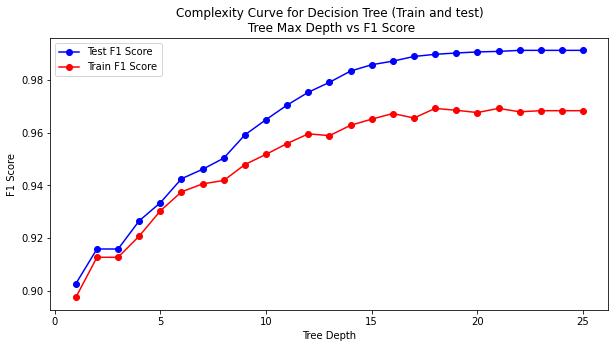

Best Param post Hyperparameter tuning: 
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 44}


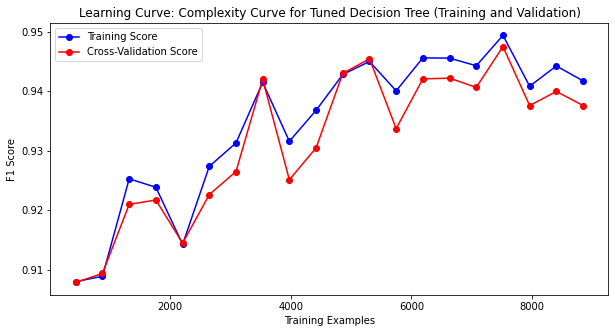

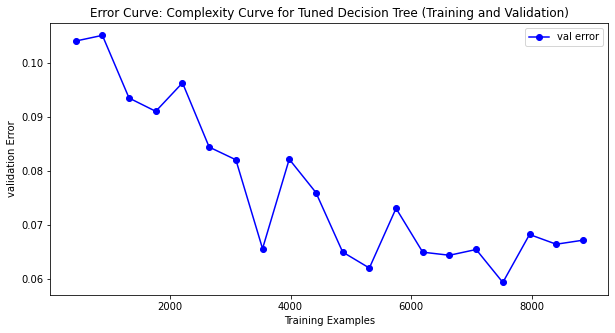

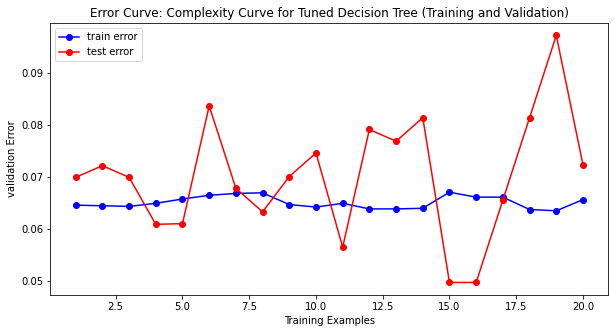

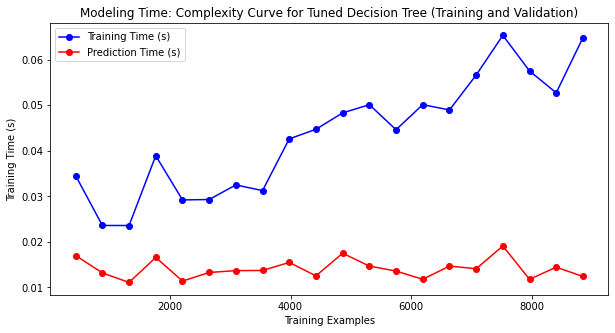

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.03658
Prediction Time (s): 0.00877

F1 Score:  0.93
Accuracy:  0.93     AUC:       0.93
Precision: 0.94     Recall:    0.93
*****************************************************


In [5]:
train_score = []
test_score = []
max_depth =list(range(1,26))
for i in max_depth:         
        DT_classifier = DecisionTreeClassifier(max_depth=i, random_state=100, min_samples_leaf=1, criterion='entropy')
        DT_classifier.fit(phishing_train_x, phishing_train_y)
        pred_train = DT_classifier.predict(phishing_train_x)
        pred_test = DT_classifier.predict(phishing_test_x)
        train_score.append(f1_score(phishing_train_y, pred_train))
        test_score.append(f1_score(phishing_test_y, pred_test))

hp.plot_graph("Complexity Curve for Decision Tree (Train and test)\n Tree Max Depth vs F1 Score",'Tree Depth', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],max_depth)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':np.linspace( round(0.005*len(phishing_train_x)),round(0.05*len(phishing_train_x)),20).round().astype('int'),
    'max_depth':np.arange(1,20)
}

DT_classifier = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=10)
DT_classifier.fit(phishing_train_x, phishing_train_y)
print("Best Param post Hyperparameter tuning: ")
print(DT_classifier.best_params_)
max_depth, min_samples_leaf, criterion = DT_classifier.best_params_['max_depth'], DT_classifier.best_params_['min_samples_leaf'], DT_classifier.best_params_['criterion']


DT_classifier_Tuned = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100, criterion=criterion)

train_samp, DT_train_score, DT_fit_time, DT_pred_time = hp.validate_and_plot(DT_classifier_Tuned, phishing_train_x,phishing_train_y,"f1",title="Complexity Curve for Tuned Decision Tree (Training and Validation)")

hp.final_classifier_evaluation(DT_classifier_Tuned, phishing_train_x, phishing_test_x, phishing_train_y, phishing_test_y,False)

# Neural Network

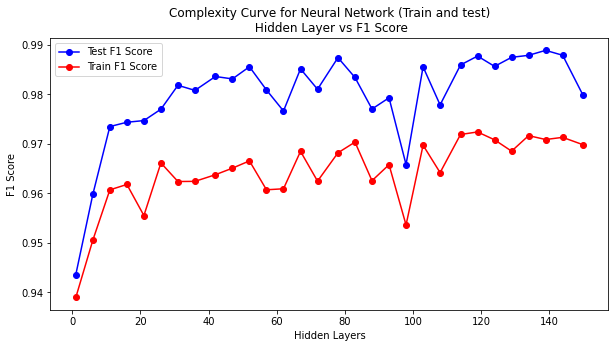

Per Hyperparameter tuning, best parameters are:
{'alpha': 0.001, 'hidden_layer_sizes': 75, 'learning_rate_init': 0.05}


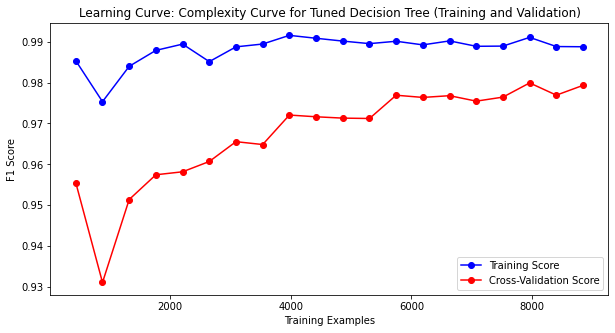

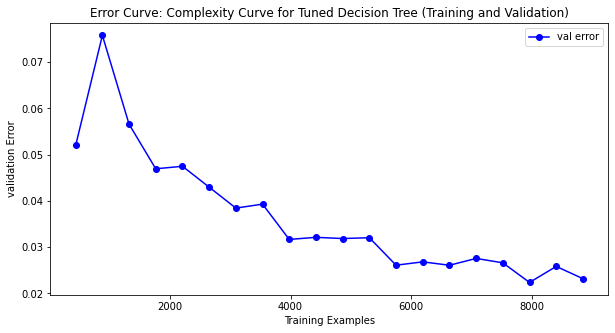

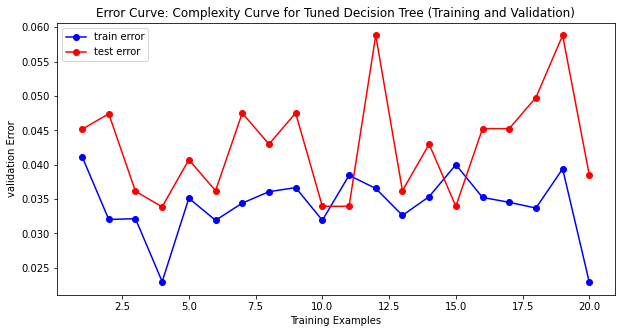

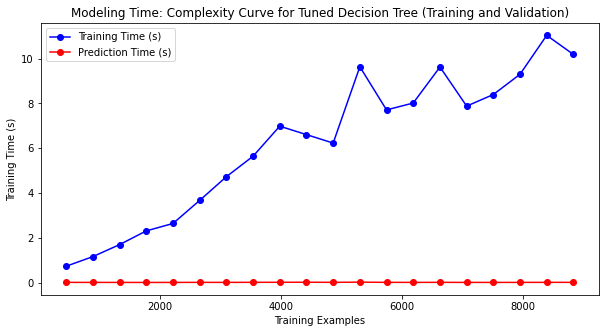

Evaluation on Test Dataset
*****************************************************
Training Time (s):   13.11347
Prediction Time (s): 0.01018

F1 Score:  0.96
Accuracy:  0.96     AUC:       0.96
Precision: 0.98     Recall:    0.95
*****************************************************


In [6]:

train_score = []
test_score = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:         
        NN_classifier = MLPClassifier(hidden_layer_sizes=(i,), solver='sgd', activation='relu', 
                            learning_rate_init=0.05, random_state=100)
        NN_classifier.fit(phishing_train_x, phishing_train_y)
        pred_train = NN_classifier.predict(phishing_train_x)
        pred_test = NN_classifier.predict(phishing_test_x)
        train_score.append(f1_score(phishing_train_y, pred_train))
        test_score.append(f1_score(phishing_test_y, pred_test))

hp.plot_graph("Complexity Curve for Neural Network (Train and test)\n Hidden Layer vs F1 Score",'Hidden Layers', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],hlist)

param_grid = {
        'hidden_layer_sizes': [5, 15, 30, 75, 100], 
        'learning_rate_init':  [0.005, 0.01, 0.05],
        'alpha' : [0.001, 0.0001]
        }

NN_classifier = GridSearchCV(estimator = MLPClassifier(random_state=100,solver='sgd', activation='relu'),
                param_grid=param_grid, cv=10)
NN_classifier.fit(phishing_train_x, phishing_train_y)
print("Per Hyperparameter tuning, best parameters are:")
print(NN_classifier.best_params_)

h_units, learn_rate, alpha = NN_classifier.best_params_['hidden_layer_sizes'], NN_classifier.best_params_['learning_rate_init'],  NN_classifier.best_params_['alpha']

NN_classifier_Tuned = MLPClassifier(hidden_layer_sizes=(h_units,), solver='sgd', activation='relu', 
                               learning_rate_init=learn_rate, random_state=100, alpha=alpha)
train_samp, NN_train_score, NN_fit_time, NN_pred_time = hp.validate_and_plot(NN_classifier_Tuned, phishing_train_x, phishing_train_y,"f1",title="Complexity Curve for Tuned Neural Network (Training and Validation)")
hp.final_classifier_evaluation(NN_classifier_Tuned, phishing_train_x, phishing_test_x, phishing_train_y, phishing_test_y,False)


# Boosted Decision Tree Classifier

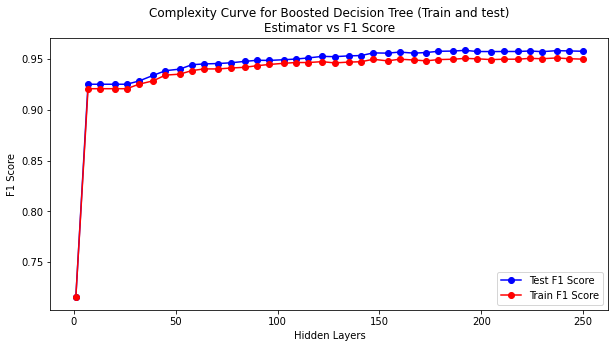

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 44, 'n_estimators': 100}


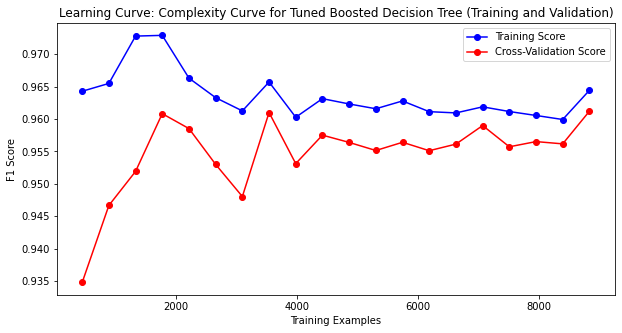

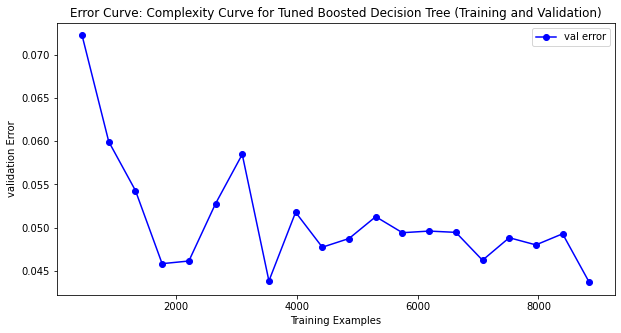

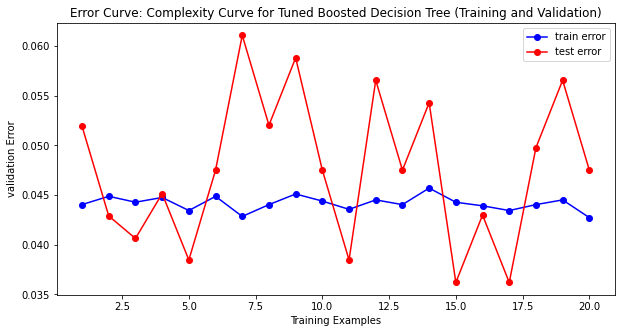

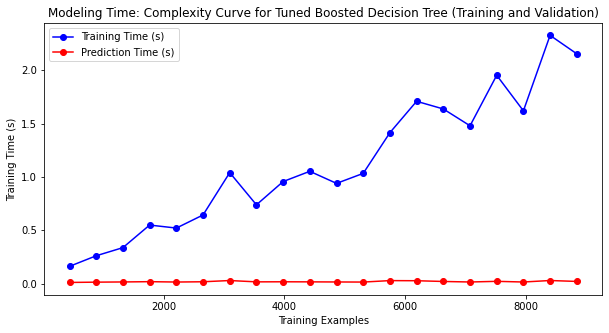

Evaluation on Test Dataset
*****************************************************
Training Time (s):   1.14660
Prediction Time (s): 0.01002

F1 Score:  0.96
Accuracy:  0.95     AUC:       0.95
Precision: 0.95     Recall:    0.96
*****************************************************


In [11]:
train_score = []
test_score = []
max_depth = 5
min_samples_leaf = 50
n_estimators = np.linspace(1,250,40).astype('int')
for i in n_estimators:         
        BDT_classifier = GradientBoostingClassifier(n_estimators=i, max_depth=int(max_depth/2), min_samples_leaf=int(min_samples_leaf/2), random_state=100,)
        BDT_classifier.fit(phishing_train_x, phishing_train_y)
        pred_train = BDT_classifier.predict(phishing_train_x)
        pred_test = BDT_classifier.predict(phishing_test_x)
        train_score.append(f1_score(phishing_train_y, pred_train))
        test_score.append(f1_score(phishing_test_y, pred_test))
      

hp.plot_graph("Complexity Curve for Boosted Decision Tree (Train and test)\nEstimator vs F1 Score",'Hidden Layers', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],n_estimators)

param_grid = {'min_samples_leaf': np.linspace(round(0.005*len(phishing_train_x)),round(0.05*len(phishing_train_x)),3).round().astype('int'),
                  'max_depth': np.arange(1,4),
                  'n_estimators': np.linspace(10,100,3).round().astype('int'),
                  'learning_rate': np.linspace(.001,.1,3)}

BDT_classifier = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv=10)
BDT_classifier.fit(phishing_train_x, phishing_train_y)
print("Per Hyperparameter tuning, best parameters are:")
print(BDT_classifier.best_params_)

max_depth, min_samples_leaf, n_est, learn_rate = BDT_classifier.best_params_['max_depth'], BDT_classifier.best_params_['min_samples_leaf'], BDT_classifier.best_params_['n_estimators'], BDT_classifier.best_params_['learning_rate']

BDT_classifier_Tuned = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_est, learning_rate=learn_rate, random_state=100)

train_samp, BDT_train_score, BDT_fit_time, BDT_pred_time = hp.validate_and_plot(BDT_classifier_Tuned, phishing_train_x, phishing_train_y,"f1",title="Complexity Curve for Tuned Boosted Decision Tree (Training and Validation)")

hp.final_classifier_evaluation(BDT_classifier_Tuned, phishing_train_x, phishing_test_x, phishing_train_y, phishing_test_y,False)



# SVM

Per Hyperparameter tuning, best parameters for kernal linear are:
{'C': 10.0, 'gamma': 1}


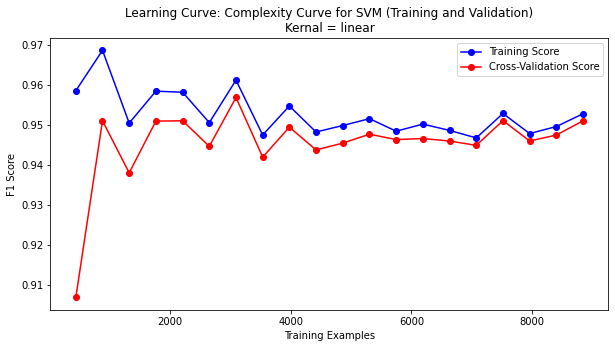

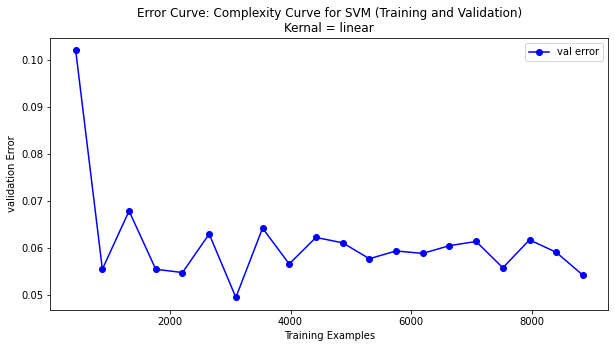

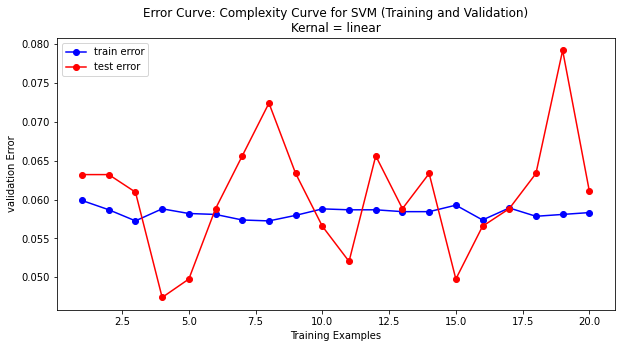

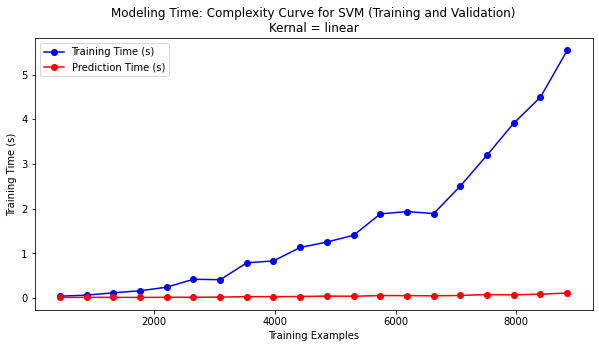

Evaluation on Test Dataset
*****************************************************
Training Time (s):   2.49667
Prediction Time (s): 0.11842

F1 Score:  0.95
Accuracy:  0.94     AUC:       0.94
Precision: 0.94     Recall:    0.95
*****************************************************
Per Hyperparameter tuning, best parameters for kernal rbf are:
{'C': 1, 'gamma': 1}


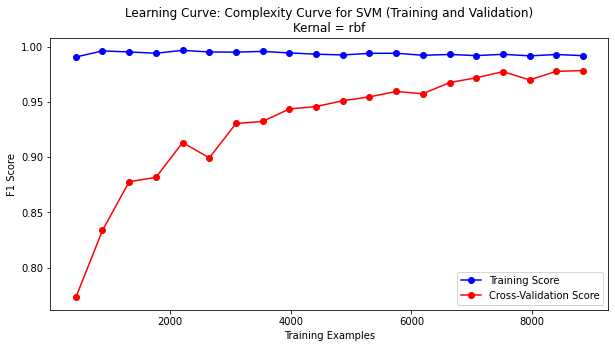

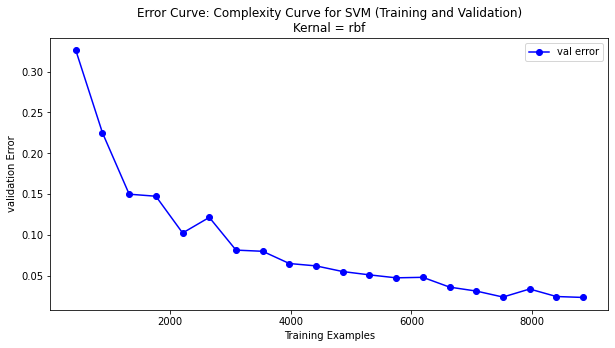

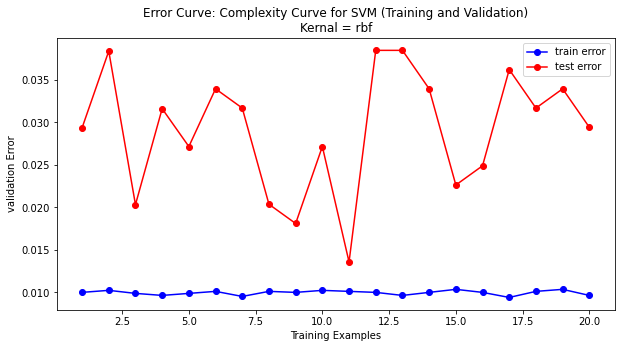

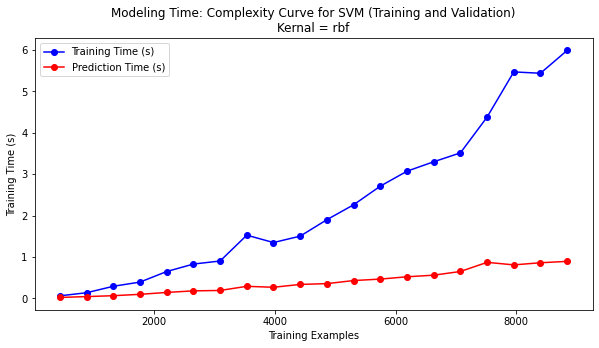

Evaluation on Test Dataset
*****************************************************
Training Time (s):   3.87016
Prediction Time (s): 1.48022

F1 Score:  0.97
Accuracy:  0.97     AUC:       0.97
Precision: 0.97     Recall:    0.97
*****************************************************


In [14]:
kernel_func = ['linear','rbf']
for i in kernel_func:            
    param_grid = {'C':  [1e-4, 1e-3, 1e-2, 1e01, 1],
                'gamma': [1,10,100]
                }

    SVM_classifier = GridSearchCV(estimator = SVC(kernel=i,random_state=100),
                        param_grid=param_grid, cv=10)
    SVM_classifier.fit(phishing_train_x, phishing_train_y)
    print("Per Hyperparameter tuning, best parameters for kernal "+i+" are:")
    print(SVM_classifier.best_params_)

    SVM_classifier_Tuned = SVC(C=SVM_classifier.best_params_['C'], gamma=SVM_classifier.best_params_['gamma'], kernel=i, random_state=100)

    train_samp, SVM_train_score, SVM_fit_time, SVM_pred_time = hp.validate_and_plot(SVM_classifier_Tuned, phishing_train_x, phishing_train_y,"f1",title="Complexity Curve for SVM (Training and Validation)\nKernal = "+i)

    hp.final_classifier_evaluation(SVM_classifier_Tuned, phishing_train_x, phishing_test_x, phishing_train_y, phishing_test_y,False)


# KNN

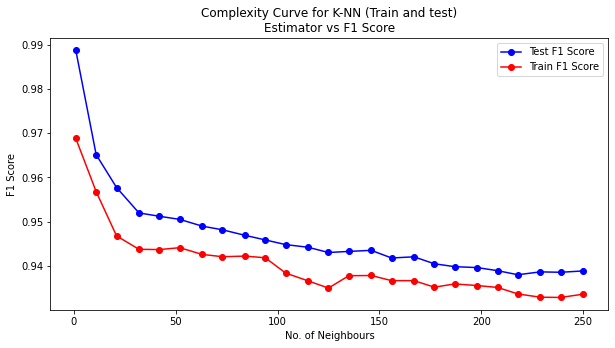

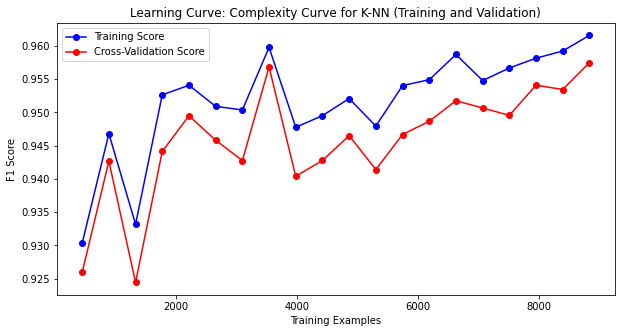

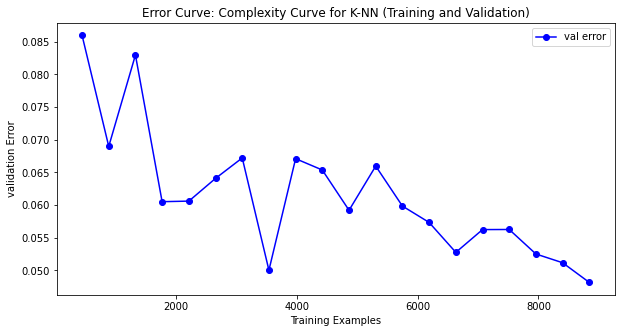

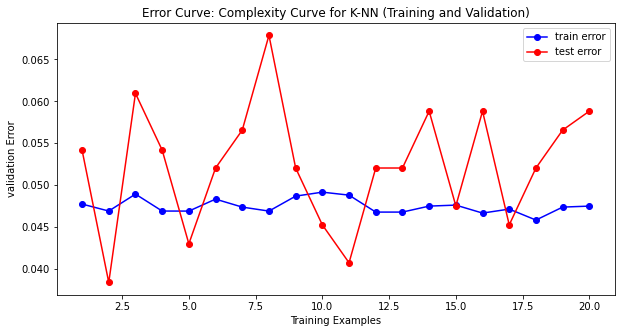

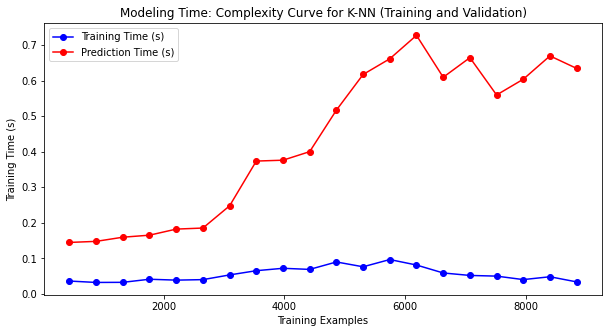

Evaluation on Test Dataset
*****************************************************
Training Time (s):   0.01599
Prediction Time (s): 0.81483

F1 Score:  0.95
Accuracy:  0.94     AUC:       0.94
Precision: 0.94     Recall:    0.95
*****************************************************


In [12]:
train_score = []
test_score = []
klist = np.linspace(1,250,25).astype('int')
for i in klist:         
        KNN_classifier =  kNN(n_neighbors=i,n_jobs=-1)
        KNN_classifier.fit(phishing_train_x, phishing_train_y)
        pred_train = KNN_classifier.predict(phishing_train_x)
        pred_test = KNN_classifier.predict(phishing_test_x)
        train_score.append(f1_score(phishing_train_y, pred_train))
        test_score.append(f1_score(phishing_test_y, pred_test))

hp.plot_graph("Complexity Curve for K-NN (Train and test)\nEstimator vs F1 Score",'No. of Neighbours', 'F1 Score', [train_score,test_score],['Test F1 Score','Train F1 Score'],klist)

      
KNN_classifier_Tuned = kNN(n_neighbors=20, n_jobs=-1)

train_samp, kNN_train_score, kNN_fit_time, kNN_pred_time = hp.validate_and_plot(KNN_classifier_Tuned, phishing_train_x, phishing_train_y,"f1",title="Complexity Curve for K-NN (Training and Validation)")

hp.final_classifier_evaluation(KNN_classifier_Tuned, phishing_train_x, phishing_test_x, phishing_train_y, phishing_test_y,False)


# 4. Final model time comparison 

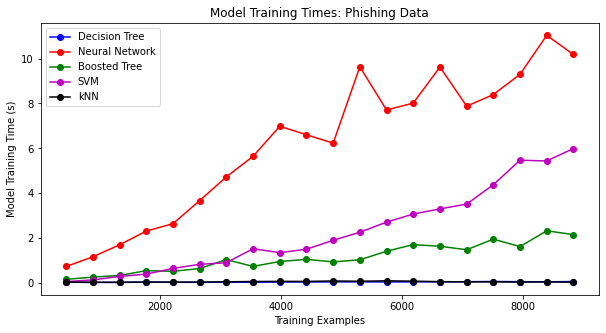

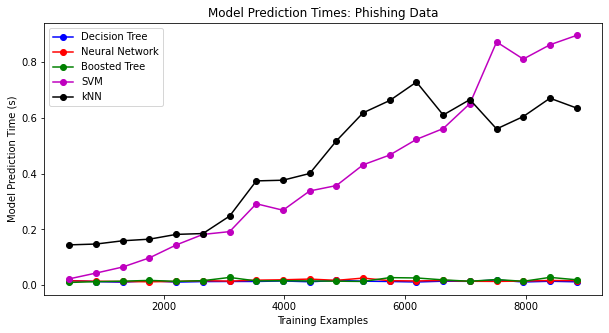

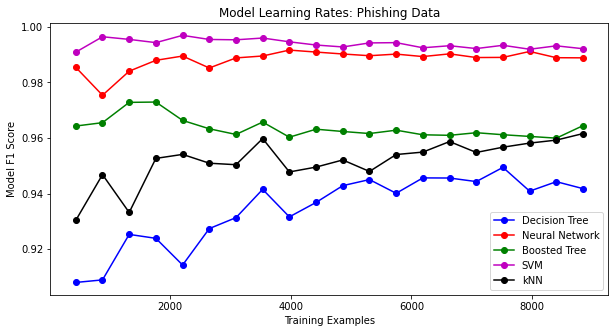

In [15]:
  
hp.plot_graph("Model Training Times: Phishing Data",
                "Training Examples", 
                "Model Training Time (s)",
               [DT_fit_time,NN_fit_time,BDT_fit_time,SVM_fit_time,kNN_fit_time],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)

hp.plot_graph("Model Prediction Times: Phishing Data",
                "Training Examples", 
                "Model Prediction Time (s)",
               [DT_pred_time,NN_pred_time,BDT_pred_time,SVM_pred_time,kNN_pred_time],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)

hp.plot_graph("Model Learning Rates: Phishing Data",
                "Training Examples", 
                "Model F1 Score",
               [DT_train_score,NN_train_score,BDT_train_score,SVM_train_score,kNN_train_score],
               ["Decision Tree","Neural Network","Boosted Tree","SVM","kNN"],
               train_samp)